In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [16]:
pd = pd.read_csv("C:\\Users\\jstyl\\Downloads\\Sample Dataset\\Soil3.csv")

In [17]:
pd.label.unique()

array(['eucalyptus', 'acacia'], dtype=object)

In [18]:
x = pd[["temperature","humidity"]]

In [19]:
x.shape

(200, 2)

<AxesSubplot:xlabel='temperature', ylabel='humidity'>

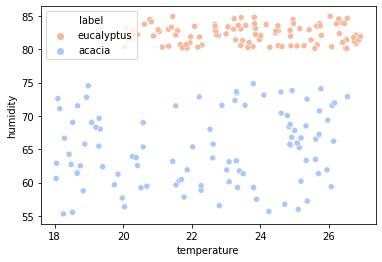

In [20]:
sns.scatterplot(data = pd, x = "temperature", y = "humidity", hue = pd.label, palette = "coolwarm_r")

In [26]:
# Perform K-means algorithm
from sklearn.cluster import KMeans
x = pd[["temperature","humidity"]]
km = KMeans(n_clusters=2, n_init = 3, init = "random", random_state = 42)
km.fit(x)
y_kmeans = km.predict(x)
y_kmeans

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

Text(0, 0.5, 'humidity')

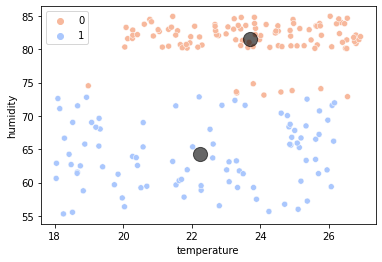

In [27]:
# Plot clusters - this is done by colour coding the data points according to which cluster the data point belongs to
sns.scatterplot(data=pd, x="temperature", y="humidity", hue= y_kmeans, palette = "coolwarm_r")
centers = km.cluster_centers_
# Plot centers
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha = 0.6);
plt.xlabel("temperature")
plt.ylabel("humidity")

C:\Users\jstyl\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


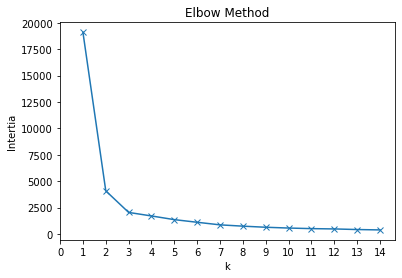

In [29]:
intertia = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(x)
    intertia.append(km.inertia_)
plt.plot(K, intertia, marker= "x")
plt.xlabel('k')
plt.xticks(np.arange(15))
plt.ylabel('Intertia')
plt.title('Elbow Method')
plt.show()